## Word2Vec

In [10]:
import collections
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Configuration
batch_size = 20

In [12]:
# Dimension of the embedding vector. Two too small to get
# any meaningful embeddings, but let's make it 2 for simple visualization
embedding_size = 2
num_sampled = 15    # Number of negative examples to sample.

### Input some sentences

In [31]:
sentences = ["I have something that I want to say to him",
            "How are you",
            "We can see many stars tonight",
            "That's our house",
            "sung likes cats",
            "she loves dogs",
            "Do you know what he has done",
            "cats are great companions when they want to be",
            "We need to invest in clean, renewable energy",
            "women love his man",
            "queen love his king",
            "girl love his boy",
            "The line is too long. Why don't you come back tomorrow",
            "man and women roam in park",
            "Does it really matter",
            "dynasty king remain mortal"]

### Convert those sentences into lines

In [32]:
# sentences to words and count
words = " ".join(sentences).split()

### List of words

In [33]:
words

['I',
 'have',
 'something',
 'that',
 'I',
 'want',
 'to',
 'say',
 'to',
 'him',
 'How',
 'are',
 'you',
 'We',
 'can',
 'see',
 'many',
 'stars',
 'tonight',
 "That's",
 'our',
 'house',
 'sung',
 'likes',
 'cats',
 'she',
 'loves',
 'dogs',
 'Do',
 'you',
 'know',
 'what',
 'he',
 'has',
 'done',
 'cats',
 'are',
 'great',
 'companions',
 'when',
 'they',
 'want',
 'to',
 'be',
 'We',
 'need',
 'to',
 'invest',
 'in',
 'clean,',
 'renewable',
 'energy',
 'women',
 'love',
 'his',
 'man',
 'queen',
 'love',
 'his',
 'king',
 'girl',
 'love',
 'his',
 'boy',
 'The',
 'line',
 'is',
 'too',
 'long.',
 'Why',
 "don't",
 'you',
 'come',
 'back',
 'tomorrow',
 'man',
 'and',
 'women',
 'roam',
 'in',
 'park',
 'Does',
 'it',
 'really',
 'matter',
 'dynasty',
 'king',
 'remain',
 'mortal']

### Count the occurance of each word

In [35]:
count = collections.Counter(words).most_common()

### Build a dictionary to lookup table

In [36]:
# Build dictionaries
reverse_dictionary = [i[0] for i in count] #reverse dic, idx -> word
dic = {w: i for i, w in enumerate(reverse_dictionary)} #dic, word -> id
voc_size = len(dic)

In [37]:
reverse_dictionary

['to',
 'you',
 'love',
 'his',
 'We',
 'man',
 'cats',
 'I',
 'in',
 'king',
 'want',
 'women',
 'are',
 'mortal',
 'be',
 'many',
 'girl',
 'dynasty',
 'come',
 'back',
 'something',
 'really',
 'too',
 'our',
 "don't",
 'and',
 'him',
 'what',
 'need',
 'energy',
 'queen',
 'matter',
 'Do',
 'loves',
 'Does',
 'they',
 'she',
 'know',
 'How',
 'remain',
 'can',
 'done',
 'has',
 'invest',
 'it',
 'tonight',
 'is',
 'great',
 'clean,',
 'see',
 'house',
 'line',
 'roam',
 'sung',
 'say',
 'Why',
 'renewable',
 'have',
 'dogs',
 'The',
 'stars',
 'companions',
 'likes',
 "That's",
 'tomorrow',
 'long.',
 'that',
 'when',
 'he',
 'boy',
 'park']

In [38]:
dic

{'Do': 32,
 'Does': 34,
 'How': 38,
 'I': 7,
 "That's": 63,
 'The': 59,
 'We': 4,
 'Why': 55,
 'and': 25,
 'are': 12,
 'back': 19,
 'be': 14,
 'boy': 69,
 'can': 40,
 'cats': 6,
 'clean,': 48,
 'come': 18,
 'companions': 61,
 'dogs': 58,
 "don't": 24,
 'done': 41,
 'dynasty': 17,
 'energy': 29,
 'girl': 16,
 'great': 47,
 'has': 42,
 'have': 57,
 'he': 68,
 'him': 26,
 'his': 3,
 'house': 50,
 'in': 8,
 'invest': 43,
 'is': 46,
 'it': 44,
 'king': 9,
 'know': 37,
 'likes': 62,
 'line': 51,
 'long.': 65,
 'love': 2,
 'loves': 33,
 'man': 5,
 'many': 15,
 'matter': 31,
 'mortal': 13,
 'need': 28,
 'our': 23,
 'park': 70,
 'queen': 30,
 'really': 21,
 'remain': 39,
 'renewable': 56,
 'roam': 52,
 'say': 54,
 'see': 49,
 'she': 36,
 'something': 20,
 'stars': 60,
 'sung': 53,
 'that': 66,
 'they': 35,
 'to': 0,
 'tomorrow': 64,
 'tonight': 45,
 'too': 22,
 'want': 10,
 'what': 27,
 'when': 67,
 'women': 11,
 'you': 1}

In [39]:
# Make indexed word data
data = [dic[word] for word in words]
print('Sample data', data[:10], [reverse_dictionary[t] for t in data[:10]])

Sample data [7, 57, 20, 66, 7, 10, 0, 54, 0, 26] ['I', 'have', 'something', 'that', 'I', 'want', 'to', 'say', 'to', 'him']


In [40]:
# Let's make a training data for window size 1 for simplicity
# ([the, brown], quick), ([quick, fox], brown), ([brown, jumped], fox),
cbow_pairs = [];
for i in range(1, len(data)-1) :
    cbow_pairs.append([[data[i-1], data[i+1]], data[i]]);
print('Context pairs', cbow_pairs[:10])

Context pairs [[[7, 20], 57], [[57, 66], 20], [[20, 7], 66], [[66, 10], 7], [[7, 0], 10], [[10, 54], 0], [[0, 0], 54], [[54, 26], 0], [[0, 38], 26], [[26, 12], 38]]


In [41]:
# Let's make skip-gram pairs
# (quick, the), (quick, brown), (brown, quick), (brown, fox), ...
skip_gram_pairs = [];
for c in cbow_pairs:
    skip_gram_pairs.append([c[1], c[0][0]])
    skip_gram_pairs.append([c[1], c[0][1]])
print('skip-gram pairs', skip_gram_pairs[:5])

skip-gram pairs [[57, 7], [57, 20], [20, 57], [20, 66], [66, 20]]


In [42]:
def generate_batch(size):
    assert size < len(skip_gram_pairs)
    x_data=[]
    y_data = []
    r = np.random.choice(range(len(skip_gram_pairs)), size, replace=False)
    for i in r:
        x_data.append(skip_gram_pairs[i][0])  # n dim
        y_data.append([skip_gram_pairs[i][1]])  # n, 1 dim
    return x_data, y_data

# generate_batch test
print ('Batches (x, y)', generate_batch(3))

Batches (x, y) ([8, 10, 17], [[70], [7], [31]])


In [43]:
# Input data
train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
# Ops and variables pinned to the CPU because of missing GPU implementation
with tf.device('/cpu:0'):
    # Look up embeddings for inputs.
    embeddings = tf.Variable(
        tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
    embed = tf.nn.embedding_lookup(embeddings, train_inputs) # lookup table

# Construct the variables for the NCE loss
nce_weights = tf.Variable(
    tf.random_uniform([voc_size, embedding_size],-1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

# Compute the average NCE loss for the batch.
# This does the magic:
#   tf.nn.nce_loss(weights, biases, inputs, labels, num_sampled, num_classes ...)
# It automatically draws negative samples when we evaluate the loss.
loss = tf.reduce_mean(tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed, num_sampled, voc_size))
# Use the adam optimizer
train_op = tf.train.AdamOptimizer(1e-1).minimize(loss)

Loss at  0 25.6401
Loss at  10 19.4657
Loss at  20 8.49587
Loss at  30 7.07209
Loss at  40 5.3045
Loss at  50 4.89219
Loss at  60 3.38809
Loss at  70 3.37015
Loss at  80 3.68431
Loss at  90 4.99235


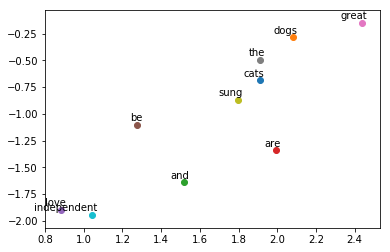

In [44]:
# Launch the graph in a session
with tf.Session() as sess:
    # Initializing all variables
    tf.global_variables_initializer().run()

    for step in range(100):
        batch_inputs, batch_labels = generate_batch(batch_size)
        _, loss_val = sess.run([train_op, loss],
                feed_dict={train_inputs: batch_inputs, train_labels: batch_labels})
        if step % 10 == 0:
            print("Loss at ", step, loss_val) # Report the loss

    # Final embeddings are ready for you to use. Need to normalize for practical use
    trained_embeddings = embeddings.eval()

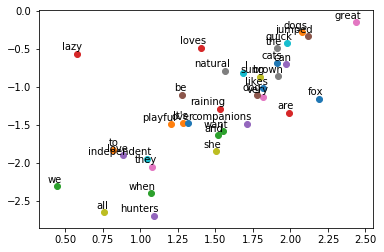

In [47]:
# Show word2vec if dim is 2
if trained_embeddings.shape[1] == 2:
    labels = rdic[:50] # Show top 50 words
    for i, label in enumerate(labels):
        x, y = trained_embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2),
            textcoords='offset points', ha='right', va='bottom')
    plt.savefig("word2vec.png")